## 4 Linear Regression


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("./linreg_data.csv")
data.head()

,Unnamed: 0,X,Y
0,0,4.910131,2.196544
1,1,1.500393,2.776927
2,2,2.946845,3.316272
3,3,6.102233,3.459587
4,4,5.168895,4.685546


##### 1. For the given example, implement a linear regression minimizing the sum of squared error from scratch.

[1.9809107076502455, 0.32441822817991023]


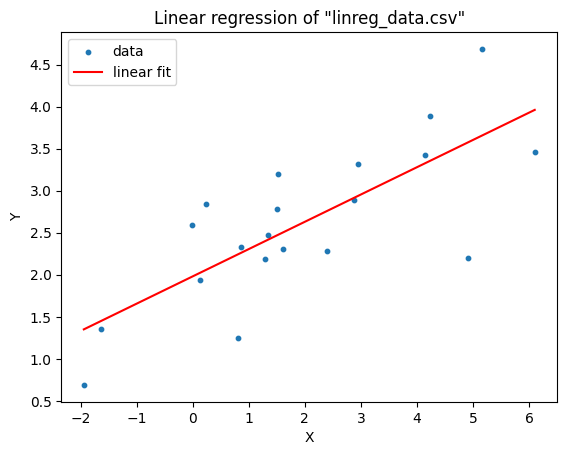

In [5]:
y = data["Y"].to_list()
X = data["X"].to_list()

minX = min(X)
maxX = max(X)

assert len(y) == len(X)

# very stupid, but it works
for i in range(len(y)):
    y[i] = [y[i]]
    X[i] = [1, X[i]]

B = np.matmul(
    (
        np.linalg.inv(
            np.matmul(
                np.transpose(X), X
            )
        )
    ), np.matmul(
        np.transpose(X),
        y
    )
)

B = B.tolist()
B = [B[0][0], B[1][0]]
print(B)

plt.title("Linear regression of \"linreg_data.csv\"")
plt.scatter(data["X"].to_list(), data["Y"].to_list(), s=10, label="data")
x = np.linspace(minX, maxX, 1000)
plt.plot(x, B[0] + B[1] * x, label="linear fit", color="r")


plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

##### 2. Do the same task again, but this time using "scipy.stats.linregress".

[np.float64(1.9809107076502441), np.float64(0.32441822817991056)]


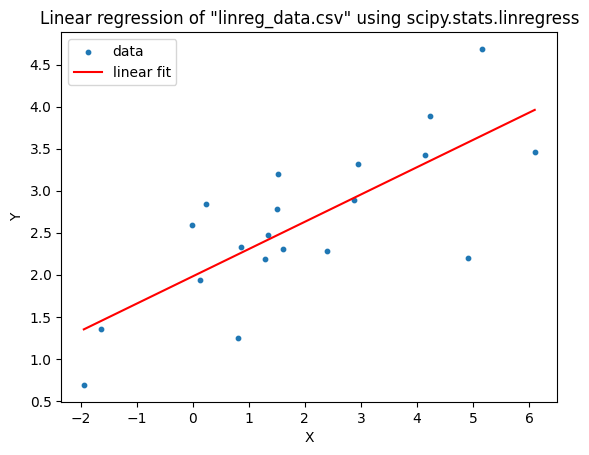

In [8]:
import scipy.stats as sf

X = data["X"].to_list()
Y = data["Y"].to_list()

res = sf.linregress(X, Y)
print([res.intercept, res.slope])

plt.title("Linear regression of \"linreg_data.csv\" using scipy.stats.linregress")

plt.scatter(X, Y, s=10, label="data")
x = np.linspace(minX, maxX, 1000)
plt.plot(x, res.intercept + res.slope * x, "r", label="linear fit")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

##### 3. Use this regression to fill in a missing value at X = 2. What is the corresponding Y value?

In [9]:
print(f"Value at x = 2 is: {res.intercept + res.slope * 2}")

Value at x = 2 is: 2.629747164010065


##### 4. How can we use this regression to smooth the original observations?

Now that we have a basic line we can fit through the dataset, we can reduce each datapoint by the linear regression value, so that the average is at zero and the standard derivation is the average of this adjusted dataset. With this modification of the data, we can easily see which points "stand out" of a linear model.